#  **Практическое занятие №4. Метод градиентного спуска**
*Семинар 28.02.2024 Высоцкий С*

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

### Одномерный случай


Функция:
$y = f(x) = x^2$

Производная: $f'(x)= 2x$

Начальное приближение: $x_0 =1.6$

Размер шага: $\gamma = 0.2$

Шаг градиентного спуска:
$x_{i+1} = x_i - \gamma 2x_i$


In [ ]:
def func(x):
    # YOUR CODE HERE
    return x ** 2

def grad(x):
    # YOUR CODE HERE
    return 2 * x

def step(x, lr):
    # YOUR CODE HERE
    return x - lr * grad(x)

In [ ]:
lr = 0.2
x_hist = [1.6]

for i in range(20):
    x_curr = x_hist[-1]
    x_next = step(x_curr, lr)
    x_hist.append(x_next)

# YOUR CODE HERE
x_hist = np.array(x_hist)
y_hist = func(x_hist)

In [ ]:
x_hist

array([1.60000000e+00, 9.60000000e-01, 5.76000000e-01, 3.45600000e-01,
       2.07360000e-01, 1.24416000e-01, 7.46496000e-02, 4.47897600e-02,
       2.68738560e-02, 1.61243136e-02, 9.67458816e-03, 5.80475290e-03,
       3.48285174e-03, 2.08971104e-03, 1.25382663e-03, 7.52295975e-04,
       4.51377585e-04, 2.70826551e-04, 1.62495931e-04, 9.74975584e-05,
       5.84985350e-05])

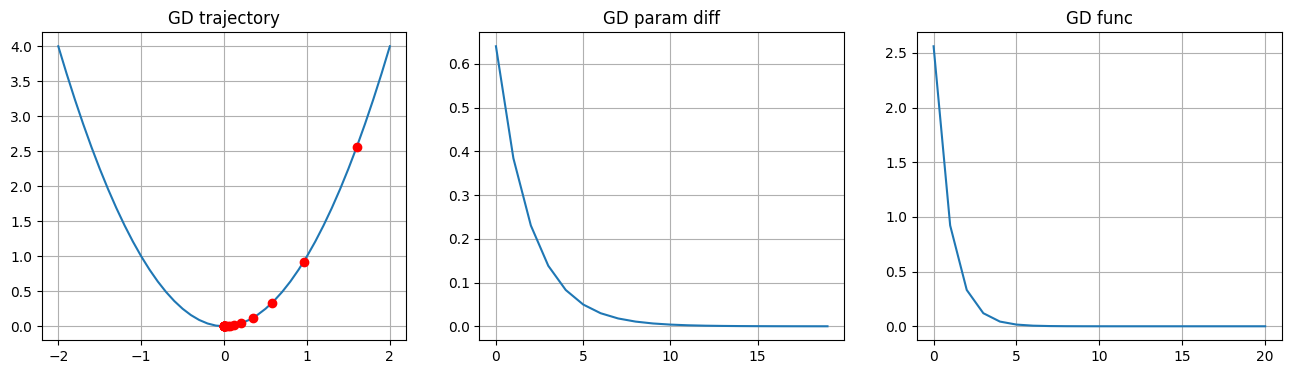

In [ ]:
plt.figure(figsize=(16,4))


plt.subplot(1, 3, 1)
plt.title('GD trajectory')

x_grid = np.arange(-2, 2.1, 0.1)
y_grid = func(x_grid)
plt.plot(x_grid, y_grid)

plt.scatter(x_hist, y_hist, c='r', zorder=10)

plt.grid()


plt.subplot(1, 3, 2)
plt.title('GD param diff')

diff = np.abs(np.diff(x_hist))
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 3, 3)
plt.title('GD func')

plt.plot(np.arange(len(y_hist)), y_hist)

plt.grid()


plt.show()

### Двумерный случай


Функция:
$z = f(x_1, x_2)\ =x_1^2 + x_2^2$


Градиент: $\nabla f(x_1, x_2) = (2x_1, 2x_2)$

Начальное приближение: $(x_0, y_0) = (0.8, 0.8)$

Размер шага: $\gamma = 0.1$

Шаг градиентного спуска:
$(x^{i+1}, y^{i+1}) = (x^i, y^i) - \gamma(2x^i, 2y^i)$

In [ ]:
def func(x):
    # YOUR CODE HERE
    return np.sum(x ** 2)

def grad(x):
    # YOUR CODE HERE
    return 2 * x

def step(x, lr):
    # YOUR CODE HERE
    return x - lr * grad(x)

In [ ]:
lr = 0.1
x_hist = [np.array([0.8, 0.8])]

for i in range(20):
    x_curr = x_hist[-1]
    x_next = step(x_curr, lr)
    x_hist.append(x_next)

# YOUR CODE HERE
x_hist = np.array(x_hist)
y_hist = [func(x) for x in x_hist]

In [ ]:
def make_levels(grid, func, num_levels=50):
    X, Y = np.meshgrid(grid, grid)
    Z = np.empty_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))
    levels = np.geomspace(np.min(Z), np.max(Z), num=num_levels)
    return X, Y, Z, levels

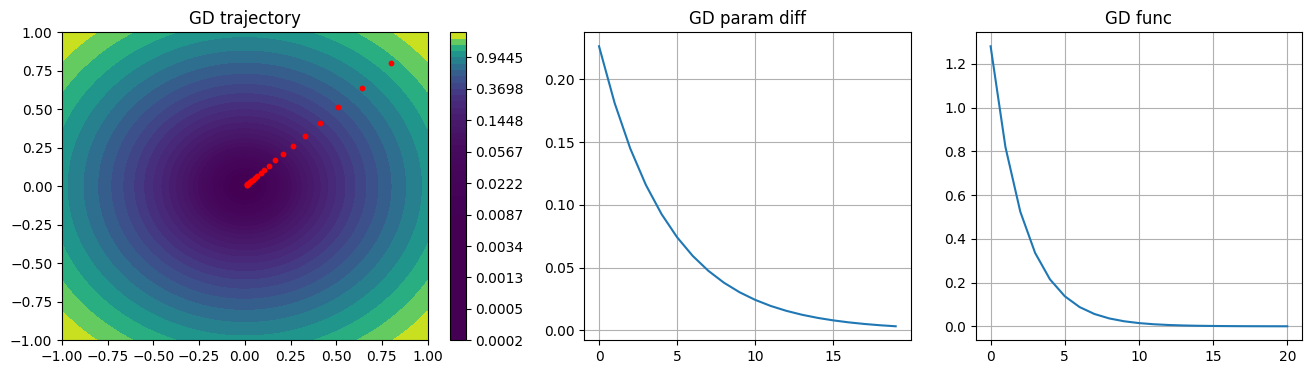

In [ ]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-1, 1, 100), func))
plt.colorbar()

plt.scatter(x_hist[:,0], x_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(x_hist[1:] - x_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD func')

plt.plot(np.arange(len(y_hist)), y_hist)

plt.grid()


plt.subplots_adjust(wspace=1)
plt.show()

### Градиентный спуск: посложнее

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на предыдущем шаге смещением в сторону антиградиента функционала:

$$w^{(t)} = w^{(t-1)} - \eta_t \nabla Q(w^{(t-1)}),$$
где $\eta_t$ — длина шага (learning rate) градиентного спуска.

Асимптотическая сложность

Оптимальный набор весов для линейной регрессии с точки зрения MSE выглядит как $w = (X^TX)^{-1}X^Ty$. В этой формуле присутствует обращение матрицы $X^TX$ — очень трудоёмкая операция при большом количестве признаков. Нетрудно подсчитать, что сложность вычислений $O(d^3 + d^2 \ell)$. При решении задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры ищут итерационными методами, стоимость которых меньше. Один из них — градиентный спуск.

Градиент MSE записывается как

$$\nabla Q(w) = 2X^T(Xw - y).$$

Сложность вычислений в данном случае $O(d \ell)$. Стохастический градиентный спуск отличается от обычного заменой градиента на несмещённую оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ — количество объектов, по которым оценивается градиент, $k \ll \ell$. Это отчасти объясняет популярность стохастических методов оптимизации.

### Визуализация траекторий GD и SGD
На простом примере разберём основные тонкости, связанные со стохастической оптимизацией.

Сгенерируем матрицу объекты—признаки $X$ и вектор весов $w_{true}$, вектор целевых переменных $y$ вычислим как $Xw_{true}$ и добавим нормальный шум:

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
n_features = 2
n_objects = 300

np.random.seed(100)
w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  # for different scales

Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))

w_0 = np.random.uniform(-1, 1, (n_features))

Зададим параметры градиентного спуска:

In [ ]:
batch_size = 10
num_steps = 50

Обучим на полученных данных линейную регрессию для MSE при помощи полного градиентного спуска — тем самым получим вектор параметров.

In [ ]:
step_size = 1e-2

w = w_0.copy()
w_list = [w.copy()]

for i in range(num_steps):
    w -= 2 * step_size * np.dot(X.T, np.dot(X, w) - Y) / Y.shape[0]
    w_list.append(w.copy())

w_list = np.array(w_list)

In [ ]:
import plotly.graph_objects as go


def compute_limits(w_list):
    dx = np.max(np.abs(w_list[:, 0] - w_true[0])) * 1.1
    dy = np.max(np.abs(w_list[:, 1] - w_true[1])) * 1.1

    return (w_true[0] - dx, w_true[0] + dx), (w_true[1] - dy, w_true[1] + dy)


def compute_levels(x_range, y_range, num: int = 100):
    x, y = np.linspace(x_range[0], x_range[1], num), np.linspace(y_range[0], y_range[1], num)
    A, B = np.meshgrid(x, y)

    levels = np.empty_like(A)

    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

    return x, y, levels


def make_contour(x, y, levels, name: str=None):
    return go.Contour(
        x=x,
        y=y,
        z=levels,
        contours_coloring='lines',
        line_smoothing=1,
        line_width=2,
        ncontours=100,
        opacity=0.5,
        name=name
    )


def make_arrow(figure, x, y):
    x, dx = x
    y, dy = y

    figure.add_annotation(
        x=x + dx,
        y=y + dy,
        ax=x,
        ay=y,
        xref='x',
        yref='y',
        text='',
        showarrow=True,
        axref='x',
        ayref='y',
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
    )


def plot_trajectory(w_list, name):
    # compute limits
    x_range, y_range = compute_limits(w_list)

    # compute level set
    x, y, levels = compute_levels(x_range, y_range)

    # plot levels
    contour = make_contour(x, y, levels, 'Loss function levels')

    # plot weights
    w_path = go.Scatter(
        x=w_list[:, 0][:-1],
        y=w_list[:, 1][:-1],
        mode='lines+markers',
        name='W',
        marker=dict(size=7, color='red')
    )

    # plot final weight
    w_final = go.Scatter(
        x=[w_list[:, 0][-1]],
        y=[w_list[:, 1][-1]],
        mode='markers',
        name='W_final',
        marker=dict(size=10, color='black'),
    )

    # plot true optimum
    w_true_point = go.Scatter(
        x=[w_true[0]],
        y=[w_true[1]],
        mode='markers',
        name='W_true',
        marker=dict(size=10, color='black'),
        marker_symbol='star'
    )

    # make the figure
    fig = go.Figure(data=[contour, w_path, w_final, w_true_point])

    fig.update_xaxes(type='linear', range=x_range)
    fig.update_yaxes(type='linear', range=y_range)

    fig.update_layout(title=name)

    fig.update_layout(
        autosize=True,
#         width=700,
        margin=dict(
            l=50,
            r=50,
            b=50,
            t=100,
            pad=4
        ),
        paper_bgcolor='LightSteelBlue',
    )

    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ))

    fig.update_traces(showlegend=True)

    fig.show()

In [ ]:
plot_trajectory(w_list, 'Gradient descent')

На лекции обсуждалось, что градиент перпендикулярен линиям уровня. Это объясняет такие зигзагообразные траектории градиентного спуска. Для большей наглядности в каждой точке пространства посчитаем градиент функционала и покажем его направление.

In [ ]:
# make new figure with contour lines
x_range, y_range = compute_limits(w_list)
x, y, levels = compute_levels(x_range, y_range)
contour = make_contour(x, y, levels, 'Loss function levels')
fig = go.Figure(data=[contour])

# visualize the gradients

x_smol, y_smol, _ = compute_levels(x_range, y_range, num=10)
x_smol, y_smol = x_smol[1:-1], y_smol[1:-1]
A_smol, B_smol = np.meshgrid(x_smol, y_smol)

for i in range(A_smol.shape[0]):
    for j in range(A_smol.shape[1]):
        w_tmp = np.array([A_smol[i, j], B_smol[i, j]])

        antigrad = -0.003 * np.dot(X.T, np.dot(X, w_tmp) - Y) / Y.shape[0]

        make_arrow(fig, (A_smol[i, j], antigrad[0]), (B_smol[i, j], antigrad[1]))


fig.update_xaxes(type='linear', range=x_range)
fig.update_yaxes(type='linear', range=y_range)

fig.update_layout(title = 'Antigradient')

fig.update_layout(
    autosize=True,
#     width=700,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    ),
    paper_bgcolor='LightSteelBlue',
)

fig.show()

Визуализируем теперь траектории стохастического градиентного спуска, повторив те же самые действия, оценивая при этом градиент по подвыборке.

In [ ]:
def calc_grad_on_batch(X, Y, w, batch_size):
    sample = np.random.choice(X.shape[0], size=batch_size, replace=False)
    return 2 * np.dot(X[sample].T, np.dot(X[sample], w) - Y[sample]) / batch_size

In [ ]:
step_size = 1e-2

w = w_0.copy()
w_list = [w.copy()]

for i in range(num_steps):
    w -= step_size * calc_grad_on_batch(X, Y, w, batch_size)
    w_list.append(w.copy())

w_list = np.array(w_list)

In [ ]:
plot_trajectory(w_list, 'Stochastic gradient descent')

</bod

Как видно, метод стохастического градиента «бродит» вокруг оптимума. Это объясняется подбором шага градиентного спуска $\eta_k$. Дело в том, что для сходимости стохастического градиентного спуска для последовательности шагов $\eta_k$ должны выполняться [условия Роббинса-Монро](https://projecteuclid.org/download/pdf_1/euclid.aoms/1177729586):
$$
\sum_{k = 1}^\infty \eta_k = \infty, \qquad \sum_{k = 1}^\infty \eta_k^2 < \infty.
$$
Интуитивно это означает следующее: (1) последовательность должна расходиться, чтобы метод оптимизации мог добраться до любой точки пространства, (2) но при этом расходиться не слишком быстро.

Попробуем посмотреть на траектории SGD, последовательность шагов которой удовлетворяет условиям Роббинса-Монро:

In [ ]:
step_size_0 = 0.01

w = w_0.copy()
w_list = [w.copy()]


for i in range(num_steps):
    step_size = step_size_0 / (i+1)
    w -= step_size * calc_grad_on_batch(X, Y, w, batch_size)
    w_list.append(w.copy())

w_list = np.array(w_list)

In [ ]:
plot_trajectory(w_list, 'Stochastic gradient descent with dynamic learning rate')

Теперь градиентный спуск движется более направленно, но не доходит до оптимума. При достаточно большом количестве шагов мы всё-таки смогли бы попасть в окрестность минимума, но это слишком долго. Попробуем более сложную схему изменения длины шага:
$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p.
$$
Попробуем взять $s_0 = 1$и поэкспериментируем с разными $\lambda$ и $p$.

In [ ]:
def sgd_with_lr_schedule(lambda_param, p=0.5, s_init=1.0, batch_size=10):
    w = w_0.copy()
    w_list = [w.copy()]


    for i in range(num_steps):
        step_size = lambda_param * np.power(s_init / (s_init + i), p)
        w -= step_size * calc_grad_on_batch(X, Y, w, batch_size)
        w_list.append(w.copy())

    return np.array(w_list)

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.8)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.5)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.35)
plot_trajectory(w_list, 'SGD with learning rate schedule')

По сути, коэффициенты в формуле для длины шага являются гиперпараметрами, и их нужно подбирать. Желательно использовать для этого валидационную выборку.

Посмотрим, как размер подвыборки, по которой оценивается градиент, влияет на сходимость.

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.35, batch_size=1)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.35, batch_size=10)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.35, batch_size=100)
plot_trajectory(w_list, 'SGD with learning rate schedule')

Вывод, в общем-то, очевидный: чем больше размер подвыборки, тем более стабильная траектория градиентного спуска. Интереснее посмотреть, как это влияет на скорость сходимости.

### Сравнение скоростей сходимости

Изучим, насколько быстро достигают оптимума методы полного и стохастического градиентного спуска. Сгенерируем выборку и построим график зависимости функционала от итерации.

In [ ]:
num_steps = 100
batch_size = 10

In [ ]:
# data generation
n_features = 50
n_objects = 10000

w_true = np.random.uniform(-2, 2, n_features)

X = np.random.uniform(-10, 10, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 5, n_objects)

In [ ]:
from scipy.linalg import norm

step_size_sgd = 1e-2
step_size_gd = 1e-2

w_sgd = np.random.uniform(-1, 1, n_features)
w_gd = w_sgd.copy()

residuals_sgd = [np.mean(np.power(np.dot(X, w_sgd) - Y, 2))]
residuals_gd = [np.mean(np.power(np.dot(X, w_gd) - Y, 2))]

norm_sgd = []
norm_gd = []


for i in range(num_steps):
    step_size = step_size_sgd / ((i+1) ** 0.4)
    sample = np.random.randint(n_objects, size=batch_size)

    w_sgd -= step_size * calc_grad_on_batch(X, Y, w_sgd, batch_size)
    residuals_sgd.append(np.mean(np.power(np.dot(X, w_sgd) - Y, 2)))
    norm_sgd.append(norm(np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample])))

    w_gd -= 2 * step_size_gd * np.dot(X.T, np.dot(X, w_gd) - Y) / Y.shape[0]
    residuals_gd.append(np.mean(np.power(np.dot(X, w_gd) - Y, 2)))
    norm_gd.append(norm(np.dot(X.T, np.dot(X, w_gd) - Y)))

In [ ]:
full_gd = go.Scatter(x=np.arange(num_steps+1), y=residuals_gd, name='Full GD')
sgd = go.Scatter(x=np.arange(num_steps+1), y=residuals_sgd, name='SGD')

fig = go.Figure(data=[full_gd, sgd])

fig.update_xaxes(type='linear', range=[-1, num_steps + 1])
fig.update_yaxes(type='linear')

fig.update_layout(title = 'Residuals comparison', xaxis=dict(title="Iteration"))

fig.update_layout(
    autosize=True,
    width=700,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    ),
    paper_bgcolor='LightSteelBlue',
)

fig.show()

In [ ]:
full_gd = go.Scatter(x=np.arange(num_steps+1), y=norm_gd, name='Full GD')
sgd = go.Scatter(x=np.arange(num_steps+1), y=norm_sgd, name='SGD')

fig = go.Figure(data=[full_gd, sgd])

fig.update_xaxes(type='linear', range=[-1, num_steps + 1])
fig.update_yaxes(type='linear')

fig.update_layout(title = 'Gradient norm comparison', xaxis=dict(title="Iteration"))

fig.update_layout(
    autosize=True,
    width=700,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    ),
    paper_bgcolor='LightSteelBlue',
)

fig.show()

Как видно, GD буквально за несколько итераций оказывается вблизи оптимума, в то время как поведение SGD может быть весьма нестабильным. Как правило, для более сложных моделей наблюдаются ещё большие флуктуации в зависимости качества функционала от итерации при использовании стохастических градиентных методов. Путём подбора величины шага можно добиться лучшей скорости сходимости, и существуют методы, адаптивно подбирающие величину шага (AdaGrad, Adam, RMSProp).

Ещё интересно посмотреть, как сильно использование mini-batch GD ускоряет сходимость. Посчитаем, за сколько шагов стохастический градиентный спуск достаточно сильно сближается с истинным решением в зависимости от размера батча.

In [ ]:
step_size_sgd = 1e-2
step_size_gd = 1e-2
num_steps = 500

w_init = np.random.uniform(-1, 1, n_features)
w_gd = w_init.copy()

for i in range(num_steps):
    w_gd -= 2 * step_size_gd * np.dot(X.T, np.dot(X, w_gd) - Y) / Y.shape[0]

best_error = np.mean(np.power(np.dot(X, w_gd) - Y, 2))
steps_before_conv = []
batch_sizes = np.arange(0, 500, 10)

for batch_size in batch_sizes:
    w_sgd = w_init.copy()
    for i in range(num_steps):
        step_size = step_size_sgd / ((i+1) ** 0.4)
        sample = np.random.randint(n_objects, size=batch_size)

        w_sgd -= step_size * calc_grad_on_batch(X, Y, w_sgd, batch_size)
        err = np.mean(np.power(np.dot(X, w_sgd) - Y, 2))
        if np.abs(err - best_error) < 1:
            break

    steps_before_conv.append(i)

In [ ]:
conv_speed = go.Scatter(x=batch_sizes, y=steps_before_conv, name='Number of steps to convergence')

fig = go.Figure(data=conv_speed)

fig.update_layout(title='Convergence speed',
                 xaxis=dict(title="batch size"),
                yaxis=dict(title="steps before convergence")
)

fig.update_layout(
    autosize=True,
    width=700,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    ),
    paper_bgcolor='LightSteelBlue',
)

fig.show()

Видно, что конкретно на этом наборе данных увеличение размера батча примерно до 100 позволяет добиться существенного ускорения сходимости. В то же время увеличение батча в 100 раз приводит и к пропорциональному замедлению каждого шага градиентного спуска. Поэтому, как правило, имеет смысл оценивать градиент по небольшой подвыборке.

### Качество оценки градиента

Интересно посмотреть, как соотносятся стохастический и полный градиенты. Для этого на каждой итерации градиентного спуска будет вычислять полный градиент и смотреть, какой косинус угла в среднем оказывается между ним и стохастической оценкой. Чтобы было с чем сравнить, посчитаем также средний косинус получается между полным градиентом и случайным вектором.

In [ ]:
from scipy.spatial import distance



def plot_angles(step_size_sgd=1e-2, step_size_gd=1e-2, batch_size=1, num_steps=200):
    w_init = np.random.uniform(-1, 1, n_features)
    w_sgd = w_init.copy()

    mean_cosine_between_grads = []
    mean_cosine_between_rand = []

    for i in range(num_steps):
        full_grad = 2 * np.dot(X.T, np.dot(X, w_sgd) - Y) / Y.shape[0]

        cosine_between_grads = []
        cosine_between_rand = []
        for i in range(1000):
            stoch_grad = calc_grad_on_batch(X, Y, w_sgd, batch_size)
            random_vector = np.random.normal(0, 1, full_grad.shape)
            cosine_between_grads.append(-distance.cosine(stoch_grad, full_grad) + 1)
            cosine_between_rand.append(-distance.cosine(random_vector, full_grad) + 1)
        mean_cosine_between_grads.append(np.mean(cosine_between_grads))
        mean_cosine_between_rand.append(np.mean(cosine_between_rand))

        step_size = step_size_sgd / ((i+1) ** 0.4)
        sample = np.random.randint(n_objects, size=batch_size)
        w_sgd -= step_size * calc_grad_on_batch(X, Y, w_sgd, batch_size)

    cos_grad = go.Scatter(x=np.arange(num_steps+1), y=mean_cosine_between_grads,
                          name='Cosine between stochastic and full gradients')
    cos_rand = go.Scatter(x=np.arange(num_steps+1), y=mean_cosine_between_rand,
                          name='Cosine between random vector and full gradient')

    fig = go.Figure(data=[cos_grad, cos_rand])

    fig.update_layout(title='Stochastic gradient estimate',
                     xaxis=dict(title="Iteration")
    )

    fig.update_layout(
        autosize=True,
        width=700,
        margin=dict(
            l=50,
            r=50,
            b=50,
            t=100,
            pad=4
        ),
        paper_bgcolor='LightSteelBlue',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

    fig.show()

In [ ]:
plot_angles(batch_size=1)

Видно, что в целом оценка по одному объекту стабильно лучше, чем движение в случайном направлении. Конечно, оценка градиента по одному объекту даёт оценки, которые достаточно сильно отклоняются от оптимального направления. Но, тем не менее, этого достаточно, чтобы попасть в окрестность оптимума.

А что если оценивать градиент по нескольким объектам?

In [ ]:
plot_angles(batch_size=10)

In [ ]:
plot_angles(batch_size=50)

Видно, что если оценивать градиент по подвыборке, то (а) качество оценки в целом выше и (б) чем мы ближе к оптимуму, тем хуже эта оценка. Можно сделать вывод, что в начале градиентного спуска надо идти в одну и ту же сторону и для оптимизации средней ошибки на всей выборки, и для оптимизации ошибки на отдельных объектах. А вот около оптимума эти направления уже начинают различаться: для уменьшения ошибки на отдельных объектах надо отходить от весов, оптимальных с точки зрения ошибки на всей выборке.

## Линейная регрессия

### Вспомним лекцию

Модель:
$$
f(X) = X w
$$

Лосс:
$$
L(w, X, y) = MSE(y, X w) =  \|y - X w\|^2_2 = \sum_i (y_i - \langle X_i, w \rangle)^2
$$

Градиент:
$$
\nabla L(w) = 2X^T(X w - y)
$$

Шаг градиентного спуска:
$$
w^{i+1} = w^i - \gamma \nabla L(w^i)
$$

**Задача:** доказать, что формула градиента верна.

Действительно, пусть $v = 2 X^T (X w - y)$, тогда:

$$
\nabla L_j(w) = \sum_i 2 (y_i - \langle X_i, w \rangle) (- X_{i,j}) = 2 \sum_i X_{i,j} (\langle X_i, w \rangle - y_i)
$$

$$
v_j = 2 \langle X_{*,j}, Xw - y \rangle = 2 \sum_i X_{i,j} (\langle X_i, w \rangle - y_i) = \nabla L_j(w)
$$

### Сгенерируем датасет

In [ ]:
n_features = 2
n_objects = 500

np.random.seed(10)

X = np.random.uniform(-10, 10, (n_objects, n_features))

w = np.random.randn(n_features)

y = X @ w + np.random.randn(n_objects)

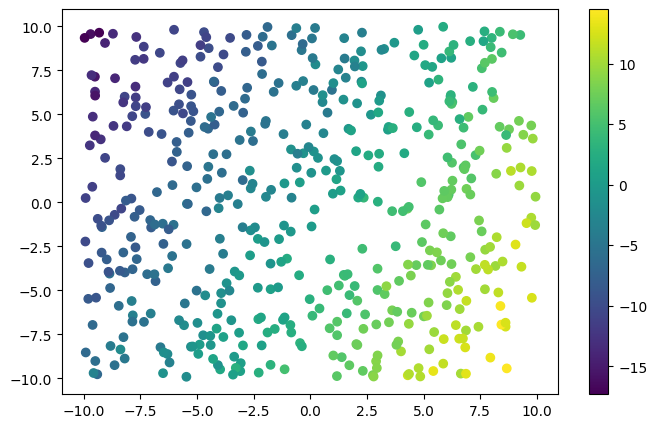

In [ ]:
plt.figure(figsize=(8, 5))

plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

plt.show()

### Реализуем градиентный спуск

In [ ]:
def loss(w, X, y):
    # YOUR CODE HERE
    return np.sum((y - X @ w) ** 2)

def grad(w, X, y):
    # YOUR CODE HERE
    return 2 * X.T @ (X @ w - y)

def step(w, X, y, lr):
    # YOUR CODE HERE
    return w - lr * grad(w, X, y)

In [ ]:
lr = 1e-5
w_hist = [np.zeros(n_features)]
l_hist = [loss(w_hist[-1], X, y)]

for i in range(20):
    w_hist.append(step(w_hist[-1], X, y, lr))
    l_hist.append(loss(w_hist[-1], X, y))

w_hist = np.array(w_hist)

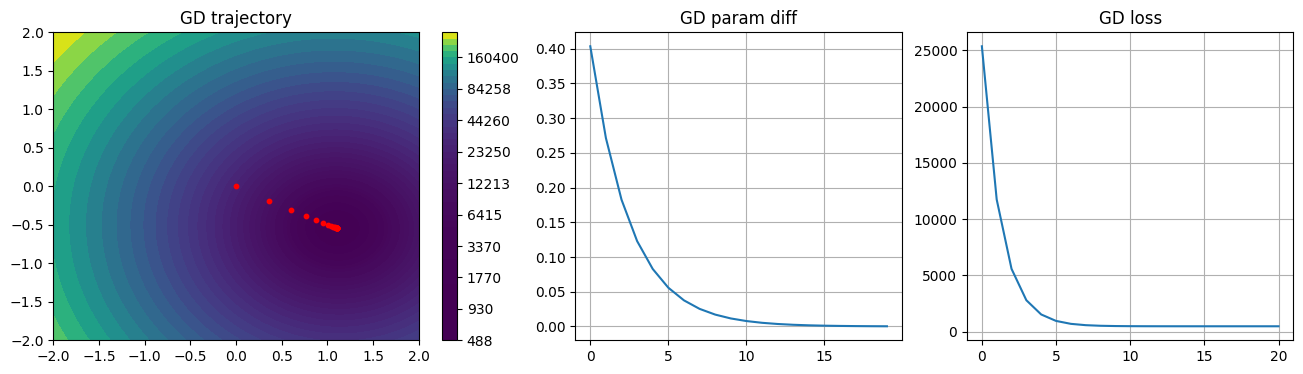

In [ ]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-2, 2), lambda w: loss(w, X, y)))
plt.colorbar()

plt.scatter(w_hist[:,0], w_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(w_hist[1:] - w_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD loss')

plt.plot(np.arange(len(l_hist)), l_hist)

plt.grid()

plt.subplots_adjust(wspace=1)
plt.show()

### Добавим динамический learning_rate

In [ ]:
lr = 1e-4

w_hist = [np.zeros(n_features)]
l_hist = [loss(w_hist[-1], X, y)]

for i in range(20):
    w_hist.append(step(w_hist[-1], X, y, lr))
    l_hist.append(loss(w_hist[-1], X, y))
    # update lr
    if l_hist[-1] > l_hist[-2]:
        lr = lr / 10

w_hist = np.array(w_hist)

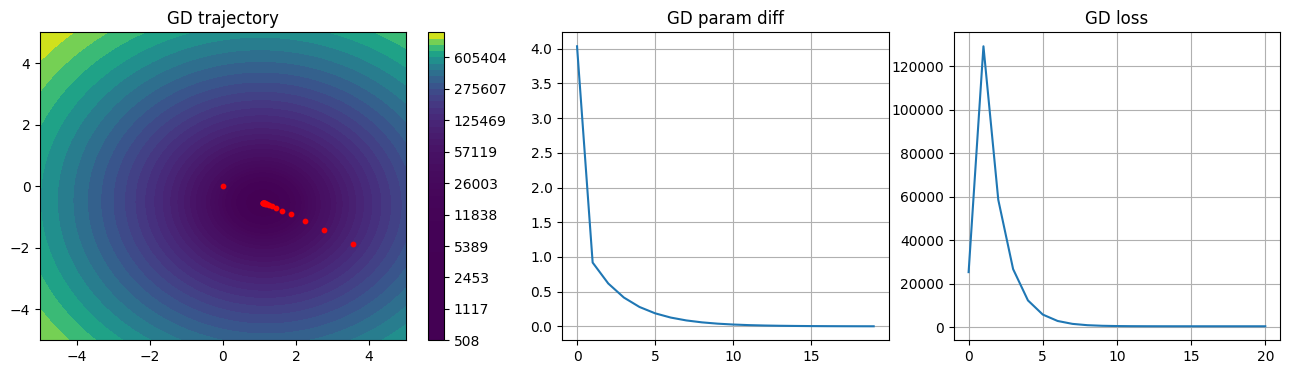

In [ ]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-5, 5), lambda w: loss(w, X, y)))
plt.colorbar()

plt.scatter(w_hist[:,0], w_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(w_hist[1:] - w_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD loss')

plt.plot(np.arange(len(l_hist)), l_hist)

plt.grid()

plt.subplots_adjust(wspace=1)
plt.show()

### Реализуем SGD

In [ ]:
lr = 5 * 1e-4
chunk_size = 5

w_hist = [np.zeros(n_features)]
l_hist = [loss(w_hist[-1], X, y)]

for i in range(20):
    ind = np.random.randint(0, high=len(X), size=chunk_size)
    X_chunk = X[ind,:]
    y_chunk = y[ind]
    w_hist.append(step(w_hist[-1], X_chunk, y_chunk, lr))
    l_hist.append(loss(w_hist[-1], X_chunk, y_chunk))

w_hist = np.array(w_hist)

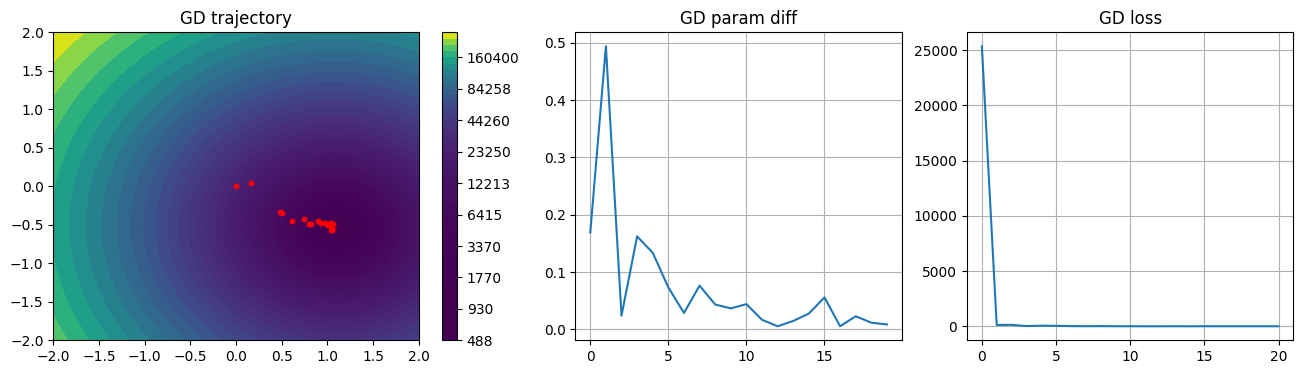

In [ ]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-2, 2), lambda w: loss(w, X, y)))
plt.colorbar()

plt.scatter(w_hist[:,0], w_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(w_hist[1:] - w_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD loss')

plt.plot(np.arange(len(l_hist)), l_hist)

plt.grid()

plt.subplots_adjust(wspace=1)
plt.show()

In [ ]:
l_hist

[25360.251852083376,
 125.1648382128632,
 135.05674343869197,
 21.031984902833642,
 56.09356875451856,
 40.088818877745126,
 18.954672015308347,
 10.3158276862177,
 16.89646735984309,
 8.06335276253612,
 7.598977195897427,
 2.808343951944859,
 4.392164228076248,
 6.844191629362199,
 3.3964751341580213,
 6.952282574095989,
 7.775442499970137,
 5.528803626571563,
 6.711127121634242,
 6.363155993837976,
 3.0982605932236558]